In [1]:
# Dataset Petrolconsumption.csv


In [2]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('Datasets/petrol_consumption.csv')

In [5]:
df.columns

Index(['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)', 'Petrol_Consumption'],
      dtype='object')

In [13]:
df.shape

(48, 5)

In [4]:
#Seprate the input output variable

In [6]:
x = df.drop('Petrol_Consumption', axis=1)

y= df['Petrol_Consumption']


In [7]:
# Split the data to test train

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, t_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [12]:
x_train.shape

(36, 4)

In [14]:
# Build the Model

In [15]:
from sklearn.ensemble import RandomForestRegressor

In [16]:
reg_rf = RandomForestRegressor(random_state=0, n_estimators=20)

In [17]:
reg_rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=20, random_state=0)

In [18]:
y_pred = reg_rf.predict(t_test)

In [19]:
# Performance Analysis

In [38]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [39]:
mean_absolute_error(y_test, y_pred), mean_absolute_percentage_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))

(58.00833333333333, 0.11049193717501382, 69.17301376500328)

In [27]:
result = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred})
result

,Actual,Predicted
29,534,577.65
4,410,521.05
26,577,624.65
30,571,638.95
32,577,629.40
37,704,616.30
34,487,616.35
40,587,555.45
7,467,465.90
10,580,575.30


In [29]:
reg_rf.estimators_

[DecisionTreeRegressor(max_features=1.0, random_state=209652396),
 DecisionTreeRegressor(max_features=1.0, random_state=398764591),
 DecisionTreeRegressor(max_features=1.0, random_state=924231285),
 DecisionTreeRegressor(max_features=1.0, random_state=1478610112),
 DecisionTreeRegressor(max_features=1.0, random_state=441365315),
 DecisionTreeRegressor(max_features=1.0, random_state=1537364731),
 DecisionTreeRegressor(max_features=1.0, random_state=192771779),
 DecisionTreeRegressor(max_features=1.0, random_state=1491434855),
 DecisionTreeRegressor(max_features=1.0, random_state=1819583497),
 DecisionTreeRegressor(max_features=1.0, random_state=530702035),
 DecisionTreeRegressor(max_features=1.0, random_state=626610453),
 DecisionTreeRegressor(max_features=1.0, random_state=1650906866),
 DecisionTreeRegressor(max_features=1.0, random_state=1879422756),
 DecisionTreeRegressor(max_features=1.0, random_state=1277901399),
 DecisionTreeRegressor(max_features=1.0, random_state=1682652230),
 D

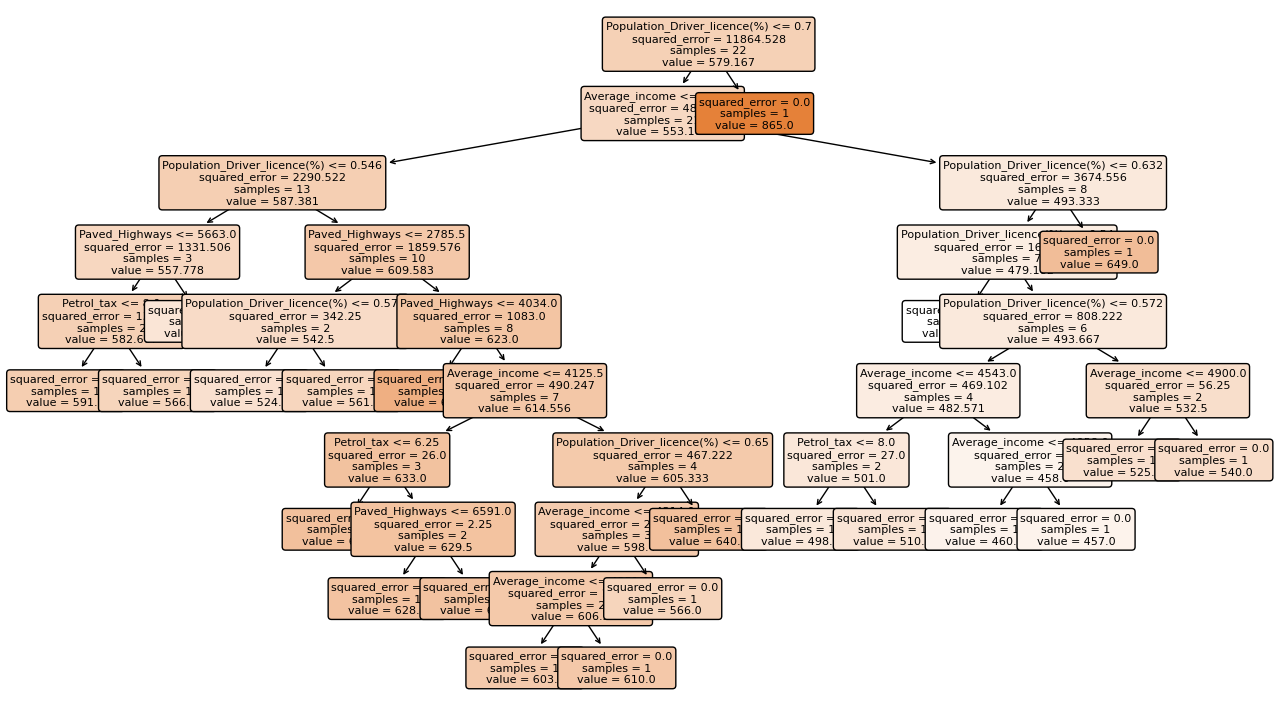

In [36]:
from sklearn.tree import plot_tree
plt.figure(figsize=(16,9))
plot_tree(reg_rf.estimators_[2], fontsize = 8, feature_names = x_train.columns, filled = True, precision = 3, rounded = True);
plt.savefig('images/RFRegression.png')